In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
import os

# Analysis of the competition network
1. Load data
2. give the cluster of nodes
3. plot the network
4. caculate the competition of netork across cluster

In [5]:
USE_SIMPLE_DATA = False

In [6]:
# change the path 
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)


In [7]:
# load the data
departmentDict = {}
with open("./rawData/cross/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross/{Ukey}.json") as f:
        department = json.load(f)
    for Skey,Svalue in department.items():
        departmentDict[f"{Ukey}_{Skey}"] = Svalue



In [8]:
# transfer to networkx Graph
with open("./rawData/cross/students.json") as f:
    studentDict = json.load(f)
cluster  = dict()
G = nx.Graph()
it = 0
for key,val in departmentDict.items():
    G.add_node(val,cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link,weight  in tail.items():
            G.add_edge(head,link,weight=weight) 

In [9]:
# load the cluster data set
os.chdir("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes")
with open(f"./processedData/{'simplify_tsneCluster.csv' if USE_SIMPLE_DATA else 'raw_tsneCluster.csv'}") as f:
    clusterData = pd.read_csv(f)
clusterMap = {f"{row['學系代碼']:06d}":row['cluster'] for idx,row in clusterData.iterrows()}

Note:  cluster 8 means other

In [10]:
# add cluster to the graph
for node in G.nodes:
    node_ = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    try :
        G.nodes[node]['cluster'] = clusterMap[node_]
    except:
        G.nodes[node]['cluster'] = 8
    try:
        G.nodes[node]['code'] = node_
    except:
        G.nodes[node]['code'] = None

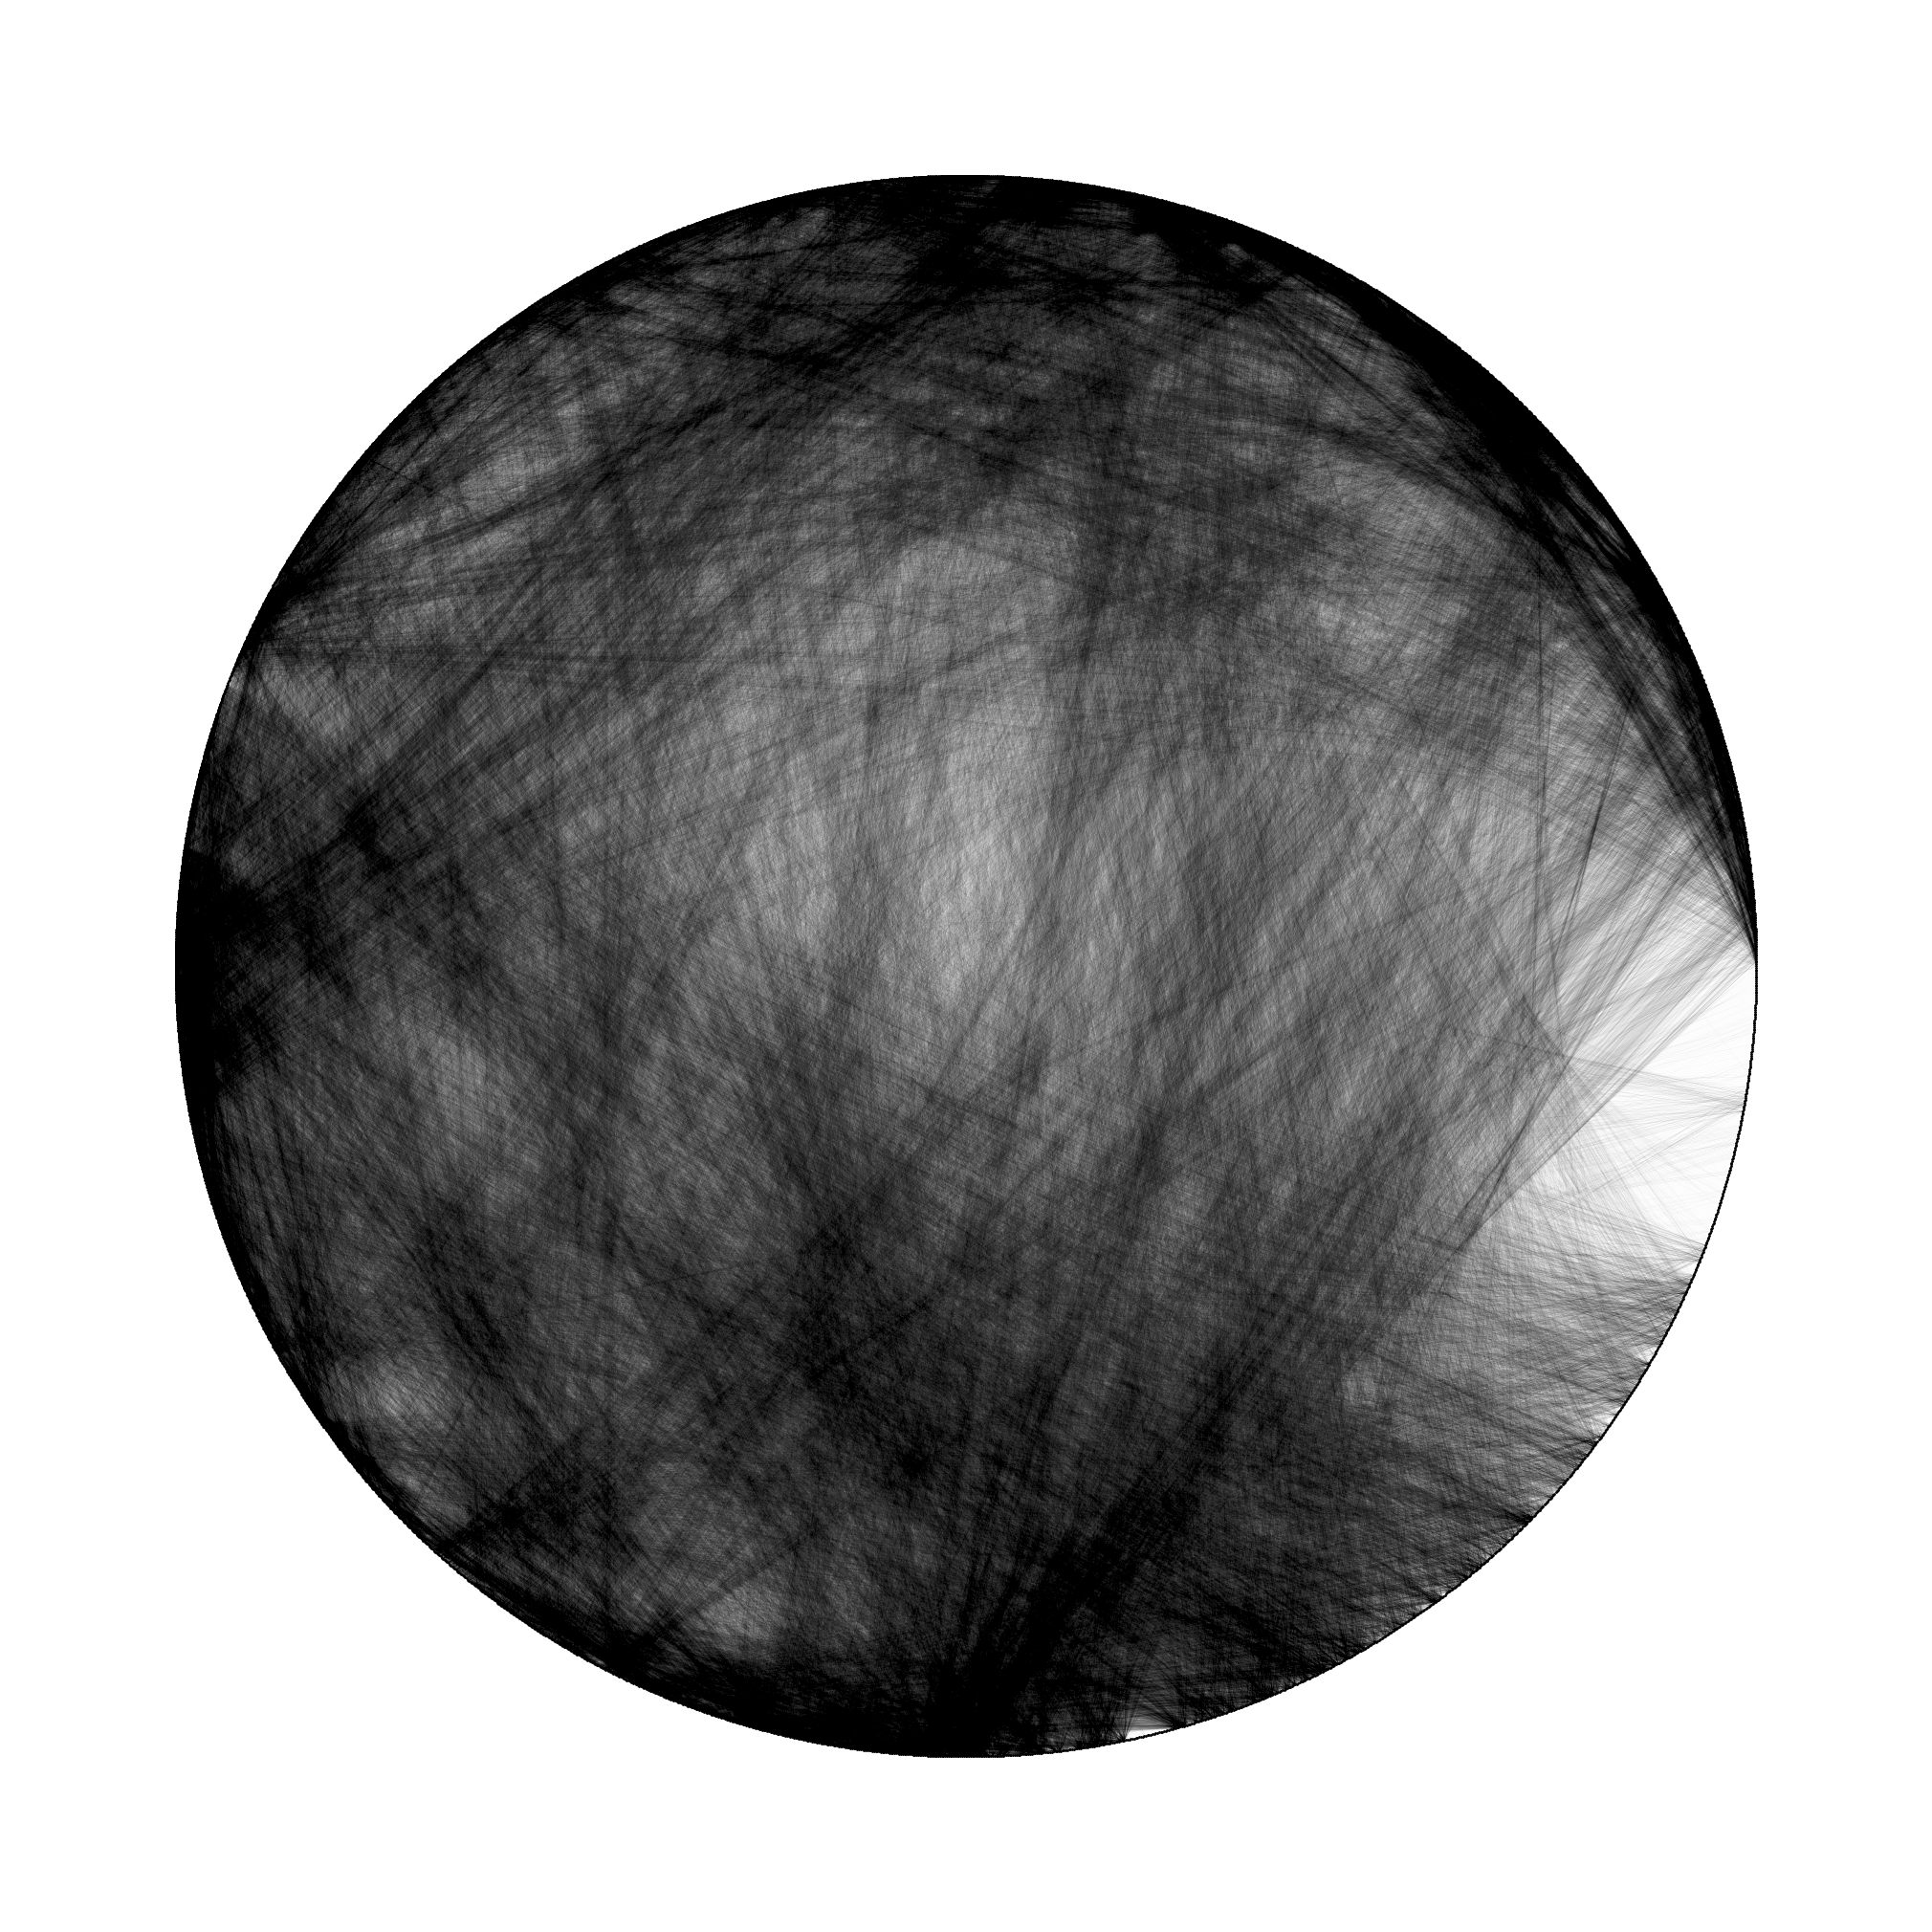

In [11]:
# draw the network
plt.figure(figsize=(20,20))

pos = nx.circular_layout(G)

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 0.01
}
# Draw custom labels
nx.draw(G, with_labels=False,pos=pos,**options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

001012
001022
001032
001042
001052
001062
001072
001082
001092
001102
001112
001122
001132
001142
001152
001162
001172
001182
001192
001202
001212
001222
001232
001242
001252
001262
001272
001282
001292
001302
001312
001322
001332
001342
001352
001362
001372
001382
001392
001402
001412
001422
001432
001442
001452
001462
001472
001482
001492
001502
001512
001522
001532
001542
001552
001562
001572
001582
001592
001602
001612
001622
001632
001642
001652
001662
001672
001682
001692
001702
001712
002012
002022
002032
002042
002052
002062
002072
002082
002092
002102
002112
002122
002132
002142
002152
002162
002172
002182
002192
002202
002212
002222
002232
002242
002252
002262
002272
002282
002292
002302
002312
002322
002332
002342
002352
002362
002372
002382
002392
002402
002412
002422
003012
003022
003032
003042
003052
003062
003072
003082
003092
003102
003112
003122
003132
003142
003152
003162
003172
003182
003192
003202
003212
003222
003232
003242
003252
003262
003272
003282
003292
003302

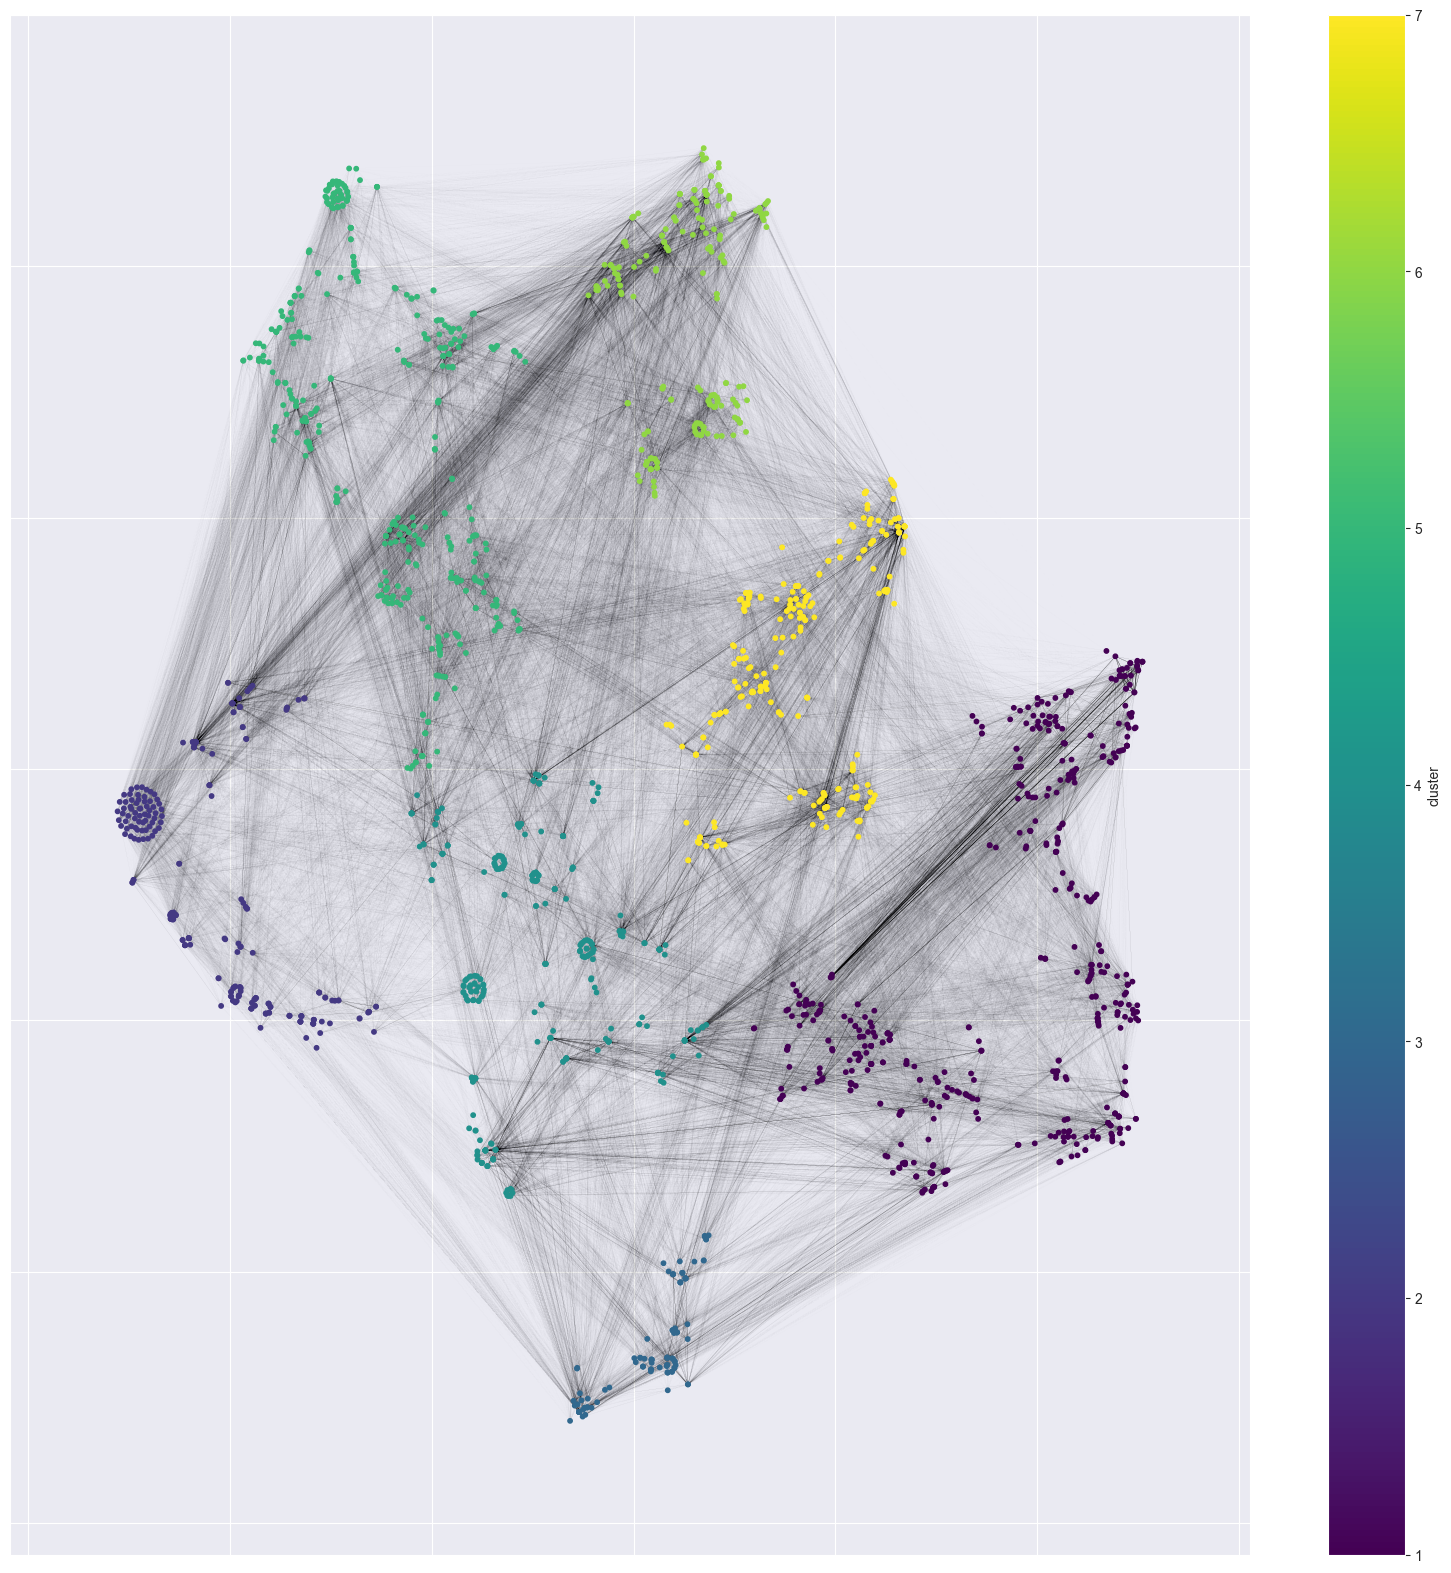

In [27]:
# draw the network with cluster and pos
Gtemp = G.copy()
pos = nx.circular_layout(Gtemp)
rmlist = []
for node in Gtemp.nodes:
    node_ = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    print(node_)
    try:
        pos.update({node:np.array([clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos1'].values[0],clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos2'].values[0]])})
    except:
        rmlist.append(node)
for node in rmlist:
    Gtemp.remove_node(node)
    
plt.figure(figsize=(20,20))
options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'width': 0.01,
    'cmap':'tab10',
    'labels':{node:Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes}
}
node_options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'cmap':'viridis'
}
edge_options = {
    'width': 0.01
}
    
# Draw custom labels
linkG = nx.draw_networkx_nodes(Gtemp,pos=pos,**node_options)
plt.colorbar(linkG,
             label='cluster')
nx.draw_networkx_edges(Gtemp,pos=pos,**edge_options)
plt.savefig(f"./pics/{'simpCompetitionNetworkCluster.png' if USE_SIMPLE_DATA else 'rawCompetitionNetworkCluster.png'}",dpi = 300)


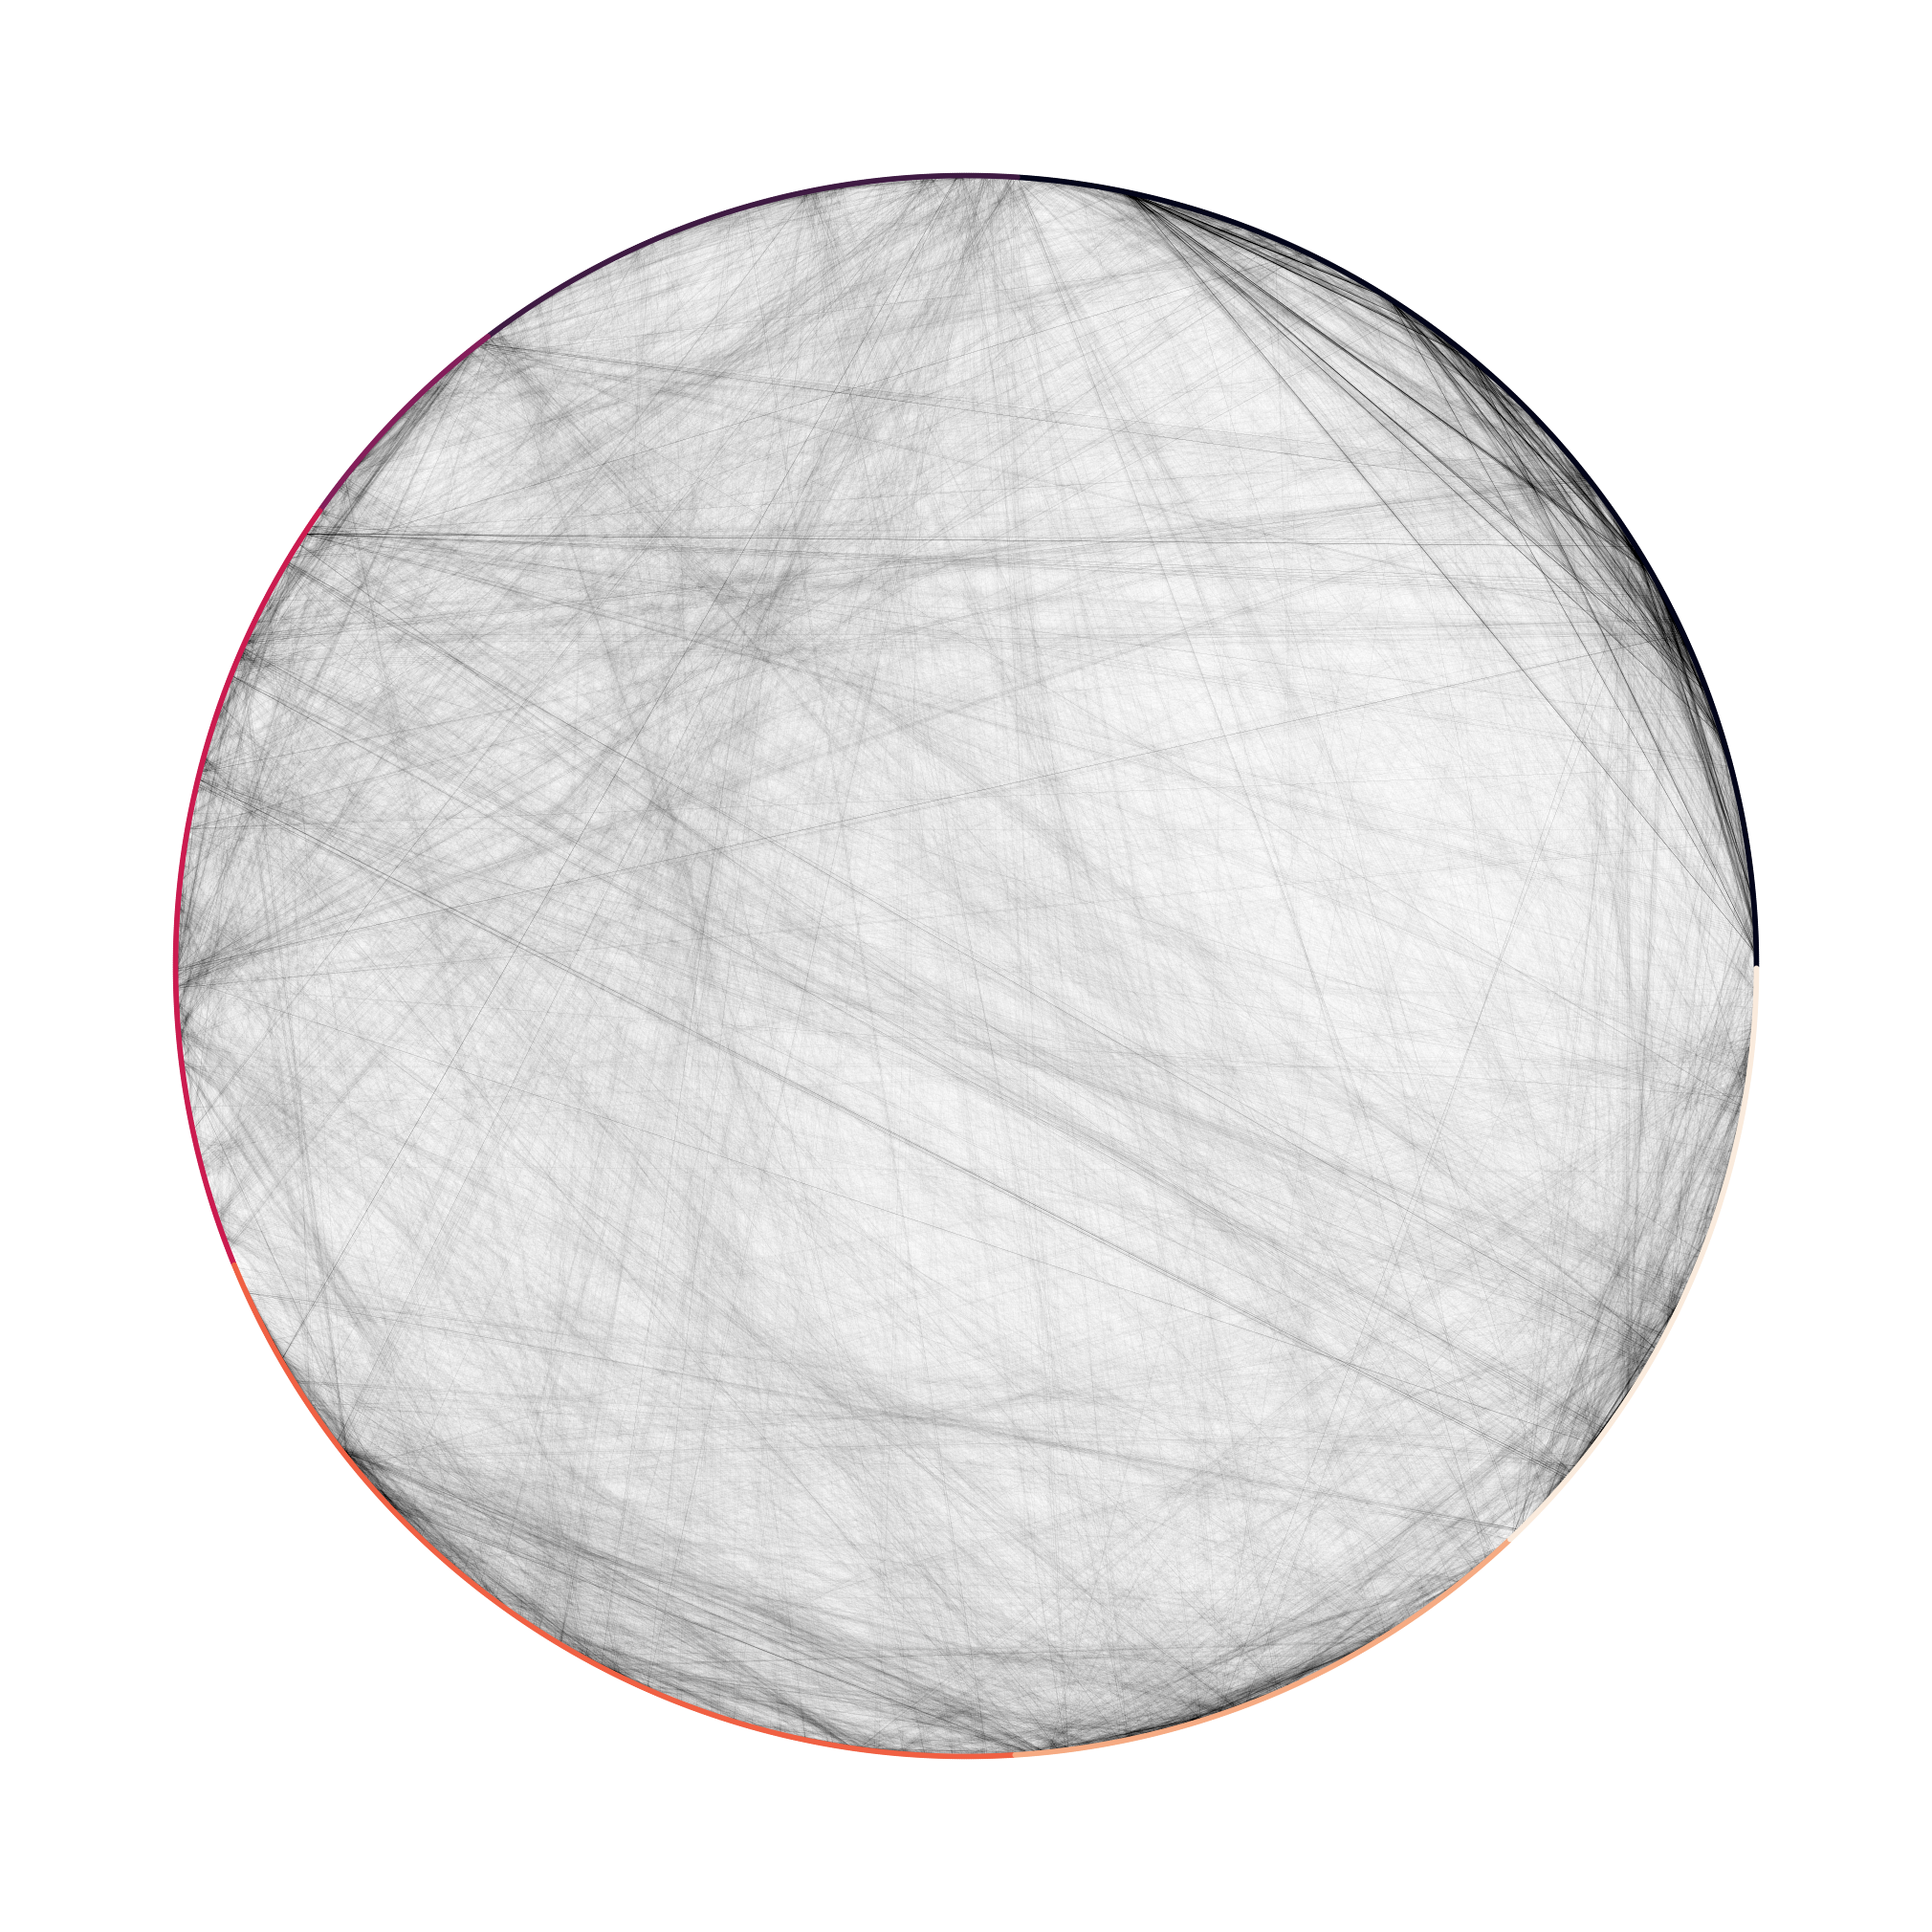

In [32]:
H = nx.Graph()

for clust in range(1,8):
    for node in Gtemp.nodes:
        if Gtemp.nodes[node]['cluster'] == clust:
            H.add_node(node,cluster=clust)
for edg in Gtemp.edges:
    H.add_edge(edg[0],edg[1],weight=Gtemp.edges[edg]['weight'])
            

plt.figure(figsize=(20,20))

pos = nx.circular_layout(H)

options = {
    'node_color': [H.nodes[node]['cluster'] for node in H.nodes],
    'node_size': 10,
    'width': [H.edges[edge]['weight']/1000 for edge in H.edges],
}
# Draw custom labels
nx.draw(H, with_labels=False,pos=pos,**options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

{}

# average connection strength between cluster

In [35]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            sumofconnection += G.edges[node,neighbor]['weight']
        for neighbor in G.neighbors(node):
            temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node,neighbor]['weight'])
        for i in range(8):
            if len(temp[i]) == 0:
                temp[i] = 0
            temp[i] = np.nanmean(temp[i])
            if temp[i] not in [np.nan,np.inf,-np.inf]:
                clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i])
            

In [36]:

clusterMatrix = np.zeros((7,8))
for i in range(7):
    for j in range(8):
        clusterMatrix[i][j] = np.nanmean(clusterTransfer[i][j])

<Figure size 3000x3000 with 0 Axes>

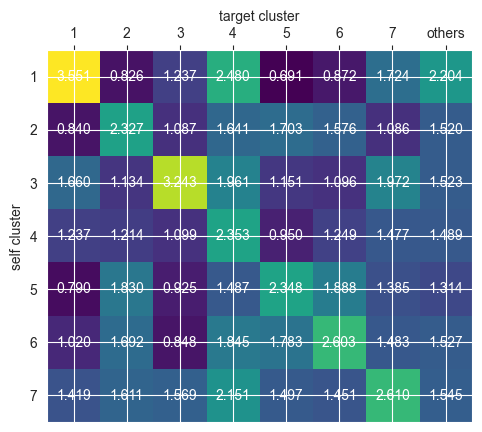

In [70]:
# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

# average transfer connection between clusters

In [71]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            try:
                temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node,neighbor]['weight'])
                sumofconnection += G.edges[node,neighbor]['weight']
            except IndexError:
                pass
        for i in range(8):
            temp[i] = np.sum(temp[i])
            clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i]/sumofconnection)
        
    

clusterMatrix = np.zeros((7,8))
for idxr,row in enumerate(clusterTransfer):
    for idxc,colist in enumerate(row):
        clusterMatrix[idxr][idxc] = np.nanmean(colist)
    


/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_88890/1139136770.py:15: RuntimeWarning: invalid value encountered in scalar divide
  clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i]/sumofconnection)


<Figure size 3000x3000 with 0 Axes>

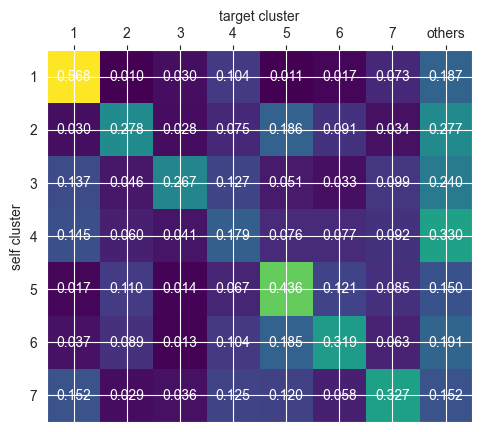

In [72]:
# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

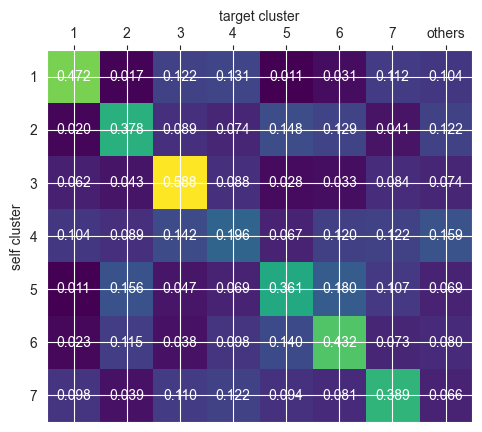

In [73]:
# adjest by size
sizemap = clusterData.groupby('cluster').size().to_dict()
sizemap[8] = len(G.nodes) - len(clusterData)
adjMatrix = np.zeros((7,8))
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = clusterMatrix[i][j] / sizemap[j+1]
rowsum = np.sum(adjMatrix,axis=1)
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = adjMatrix[i][j] / rowsum[i]

# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(adjMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(adjMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.savefig("./pics/adjClusterStrengthMatrix.png" if USE_SIMPLE_DATA else "./pics/rawAdjClusterStrengthMatrix.png")

# caculate the connection inside and outside the cluster

In [74]:
clusterData['incluster'] = None
clusterData['outcluster'] = None
for node in G.nodes():
    incluster, outcluster = 0,0
    selfcluster = G.nodes[node]['cluster']
    print(selfcluster)
    for neighbor in G.neighbors(node):
        if G.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G.edges[node,neighbor]['weight']
        else:
            outcluster += G.edges[node,neighbor]['weight']
    cleaned_code = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    try:
        cleaned_code = int(cleaned_code)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster' ] = incluster/(incluster + outcluster)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster'] = outcluster/(incluster + outcluster)
    except:
        pass
            
    
    

5
5
5
7
5
5
5
5
1
7
1
1
1
7
1
5
5
5
3
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
7
7
1
5
1
1
1
2
2
5
7
7
7
4
1
1
5
5
5
1
1
5
1
1
1
5
1
1
1
8
8
5
7
5
5
5
6
7
7
5
7
7
5
5
5
5
5
5
5
1
1
1
1
1
1
7
1
1
6
7
1
1
5
5
7
7
7
4
4
4
4
4
4
6
5
5
5
7
7
1
1
5
7
7
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
7
5
1
1
1
1
5
5
5
5
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
4
1
1
7
7
1
7
7
1
1
1
1
4
4
1
1
5
7
5
1
4
4
1
1
3
7
7
7
1
1
7
5
7
4
1
1
7
8
8
5
6
6
2
2
6
4
6
6
6
3
1
4
1
1
6
6
7
7
7
7
7
7
4
4
5
5
6
6
5
5
7
5
5
5
1
7
5
5
7
7
5
7
7
5
7
7
7
6
7
4
5
5
5
5
5
6
5
5
5
5
3
1
1
1
4
5
5
7
1
1
1
1
1
1
1
1
1
1
7
6
1
7
1
1
1
1
7
6
1
1
1
1
1
1
1
6
8
8
3
1
1
1
1
1
1
4
4
4
3
1
1
4
6
3
6
3
4
7
2
2
2
7
4
2
4
6
5
4
2
4
4
2
7
6
6
6
6
5
6
4
4
4
4
1
1
3
7
1
1
3
6
1
4
4
4
4
4
4
1
7
5
7
7
7
7
4
3
3
7
7
7
7
5
5
4
5
4
4
4
4
1
6
6
4
7
6
6
6
6
4
2
5
5
5
5
5
5
7
5
5
5
7
7
7
7
7
1
1
7
7
7
1
1
1
7
7
1
1
1
1
1
1
7
1
1
1
1
1
3
1
1
1
7
7
7
7
7
7
5
7
4
4
4
7
7
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
7
1
8
8
1
1
1
1
1
4
1
1
1
1
1
1
1
1


In [75]:
clusterData.drop("Unnamed: 0",axis = 1).to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster.csv")

In [76]:
os.getcwd()

'/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes'

In [39]:
clustersum = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        clustersum[i][j] = np.sum(clusterTransfer[i][j])

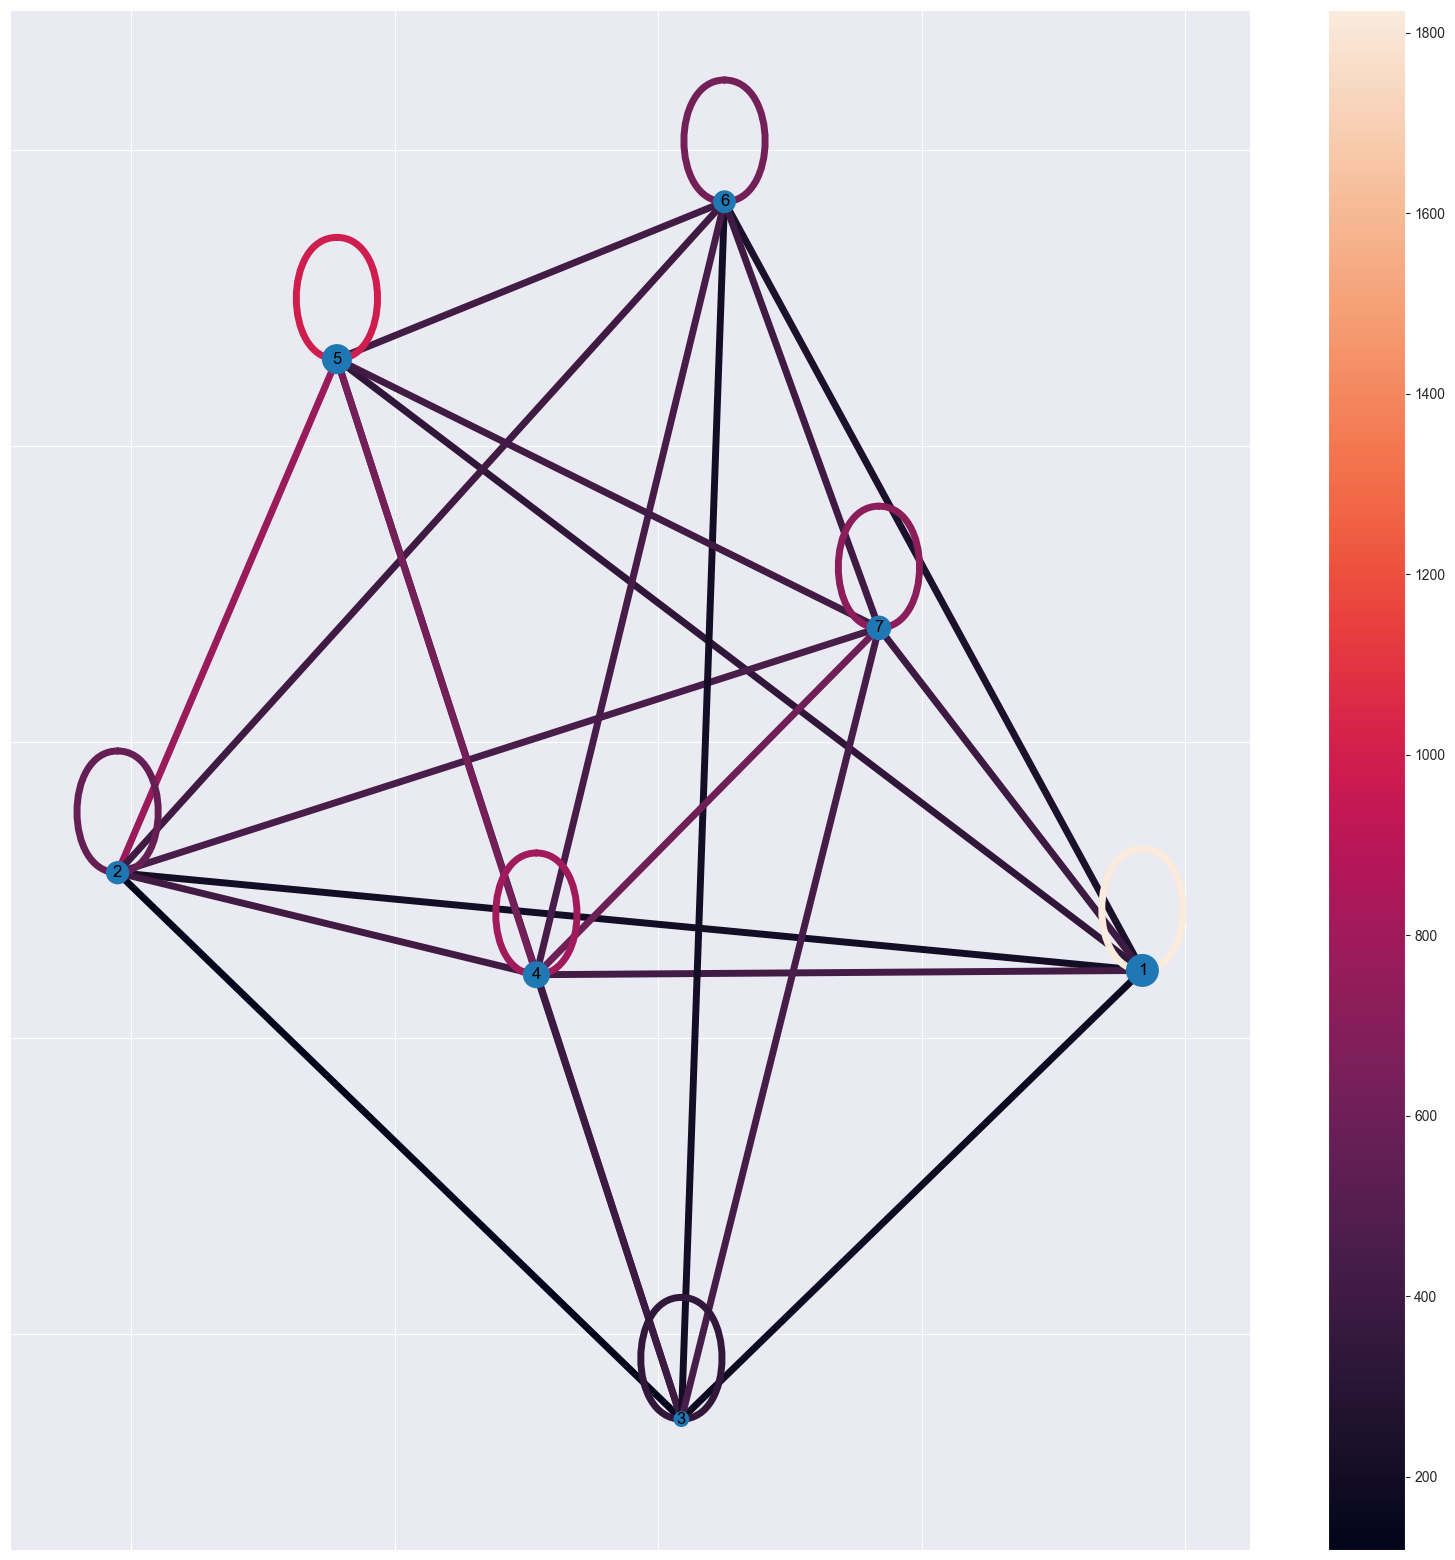

In [70]:
plt.figure(figsize=(20,20))
Gcluster = nx.Graph()
pos = {}
for i in range(7):
    for j in range(7):
        Gcluster.add_edge(i+1,j+1,weight=clustersum[i][j])
    pos[i+1] = clusterData.loc[clusterData['cluster'] == i+1,['tsnepos1','tsnepos2']].mean().values
node_options = {
    'node_size': [clusterData.loc[clusterData['cluster'] == i+1].shape[0] for i in range(7)],
    'nodelist': [i+1 for i in range(7)]
}
edge_options = {
    'edge_color': [Gcluster.edges[edge]['weight'] for edge in Gcluster.edges],
    'width': 5
}
label_options= { 
    'labels':{node:int(node) for node in Gcluster.nodes}
}


nx.draw_networkx_nodes(Gcluster,pos=pos,**node_options)
pathcollection = nx.draw_networkx_edges(Gcluster,pos=pos,**edge_options)
nx.draw_networkx_labels(Gcluster,pos=pos,**label_options)
plt.colorbar(pathcollection)
plt.savefig(f"./pics/{'simpClusterConnection.png' if USE_SIMPLE_DATA else 'rawClusterConnection.png'}")